In [1]:
from spyral.core.run_stacks import form_run_string
from spyral_utils.plot import Histogrammer ## Custom histogramming tool 

from pathlib import Path
import h5py
import polars as pl
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
grammer = Histogrammer()

grammer.add_hist1d('total_events_ic', 4095, (0.0, 4095.0))

event_data_path = Path("c:\\Users\\schaeffe\\Desktop\\e20009_analysis-output\\EventData")

start_run = 108
end_run = 320  # Adjust as needed

ic_min_val = 900
ic_max_val = 1300

for run in range(start_run, end_run+1):
    df = None
    try:
        path = event_data_path / f"{form_run_string(run)}.parquet"
        df = pl.read_parquet(path)
    except Exception:
        continue

    # Apply appropriate analysis gates
    df = df.filter((pl.col("ic_multiplicity") == 1)
                 & (pl.col("ic_sca_multiplicity") == 1))
    df = df.filter(
        (abs(pl.col("ic_centroid") - pl.col("ic_sca_centroid")) <= 10)
    )
    df = df.filter((pl.col('ic_amplitude') > ic_min_val) & (pl.col('ic_amplitude') < ic_max_val))


    ic_amp = df.select(pl.col("ic_amplitude")).to_numpy().flatten()
    # print(run)
    # print(len(ic_amp))
    grammer.fill_hist1d("total_events_ic", ic_amp)

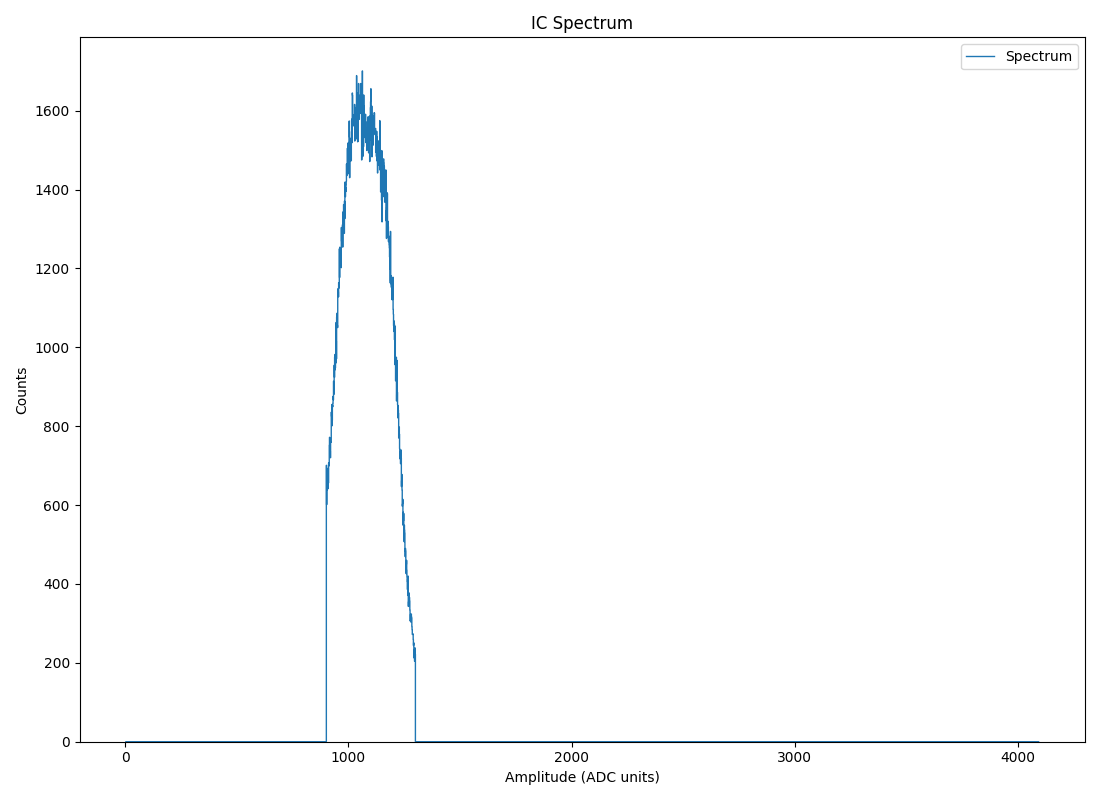

In [3]:
total_events_ic = grammer.get_hist1d('total_events_ic')

fig, ax = plt.subplots(1,1)
ax.stairs(total_events_ic.counts, edges=total_events_ic.bins, label="Spectrum")
ax.set_title('IC Spectrum')
ax.set_xlabel('Amplitude (ADC units)')
ax.set_ylabel("Counts")
ax.legend()
fig.set_figheight(8.0)
fig.set_figwidth(11.0)
fig.tight_layout()

In [4]:
print(sum(total_events_ic.counts))

461561
